In [28]:
import torch
import numpy as np
from torch import nn
from torch.autograd import Variable
import torch.nn.functional as F

import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
# Simulated data - polar rose

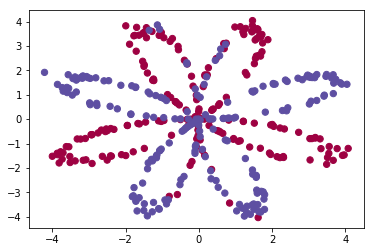

In [30]:
# r(theta)= r*cos(a*theta), or r(theta)=r*sin(a*theta)
np.random.seed(1)
m = 400 
N = int(m/2) 
D = 2 
x = np.zeros((m, D))
y = np.zeros((m, 1), dtype='uint8') # label 向量，0 表示红色，1 表示蓝色
a = 4

# a=4， 2a petals
for j in range(2):
    ix = range(N*j,N*(j+1))
    t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
    r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
    x[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j
    
plt.scatter(x[:, 0], x[:, 1], c=y.reshape(-1), s=40, cmap=plt.cm.Spectral)

In [32]:
# Try logistic regression first
x = torch.from_numpy(x).float()
y = torch.from_numpy(y).float()

w = nn.Parameter(torch.randn(2,1))
b = nn.Parameter(torch.zeros(1))
optimizer = torch.optim.SGD([w,b], 1e-1)

def logistic_regression(x):
    return torch.mm(x,w)+b

criterion = nn.BCEWithLogitsLoss() 

for e in range(100):
    out = logistic_regression(Variable(x))
    loss = criterion(out, Variable(y))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (e + 1) % 20 == 0:
        print('epoch:{}, loss{}'.format(e+1, loss.data[0]))

epoch:20, loss0.6743003129959106
epoch:40, loss0.6731818914413452
epoch:60, loss0.6731509566307068
epoch:80, loss0.6731477975845337
epoch:100, loss0.6731467247009277


/home/xiuchao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


/home/xiuchao/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Text(0.5,1,'logistic regression')

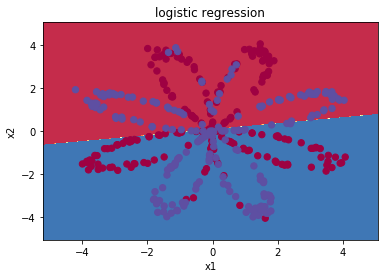

In [46]:
def plot_decision_boundary(model, x, y):
    # Set min and max values and give it some padding
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral) 
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(x[:, 0], x[:, 1], c=y.reshape(-1), s=40, cmap=plt.cm.Spectral)

def plot_logistic(x):
    x = Variable(torch.from_numpy(x).float())
    out = F.sigmoid(logistic_regression(x))
    out = (out > 0.5)*1
    return out.data.numpy()

plot_decision_boundary(lambda x: plot_logistic(x), x.numpy(), y.numpy())
plt.title('logistic regression')

In [47]:
# Try two-layer neural network then

In [48]:
w1 = nn.Parameter(torch.randn(2,4)*0.01)
b1 = nn.Parameter(torch.zeros(4))

w2 = nn.Parameter(torch.randn(4,1)*0.01)
b2 = nn.Parameter(torch.zeros(1))

# nn model
def two_network(x):
    x1 = torch.mm(x, w1) + b1
    x1 = F.tanh(x1)
    x2 = torch.mm(x1, w2) + b2
    return x2

optimizer = torch.optim.SGD([w1, w2, b1, b2], 1)
criterion = nn.BCEWithLogitsLoss()

# train 10000
for e in range(10000):
    out = two_network(Variable(x))
    loss = criterion(out, Variable(y))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (e+1)%1000 == 0:
        print('epoch:{}, loss{}'.format(e+1, loss.data[0]))


/home/xiuchao/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/xiuchao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


epoch:1000, loss0.2673979699611664
epoch:2000, loss0.24326154589653015
epoch:3000, loss0.23393867909908295
epoch:4000, loss0.22837123274803162
epoch:5000, loss0.22450141608715057
epoch:6000, loss0.2215990275144577
epoch:7000, loss0.21931731700897217
epoch:8000, loss0.21747225522994995
epoch:9000, loss0.21595416963100433
epoch:10000, loss0.21468786895275116


/home/xiuchao/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/xiuchao/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Text(0.5,1,'2 layer network')

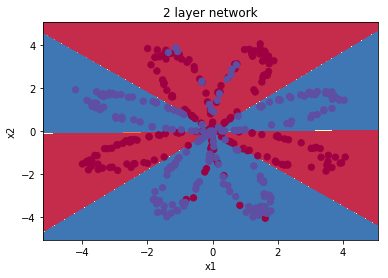

In [49]:
def plot_network(x):
    x = Variable(torch.from_numpy(x).float())
    x1 = torch.mm(x, w1) + b1
    x1 = F.tanh(x1)
    x2 = torch.mm(x1, w2) + b2
    out = F.sigmoid(x2)
    out = (out > 0.5) * 1
    return out.data.numpy()

plot_decision_boundary(lambda x: plot_network(x), x.numpy(), y.numpy())
plt.title('2 layer network')

In [60]:
# Sequantial ==============================
seq_net = nn.Sequential(
    nn.Linear(2,4),
    nn.Tanh(),
    nn.Linear(4,1))

# 1st layer
seq_net[0]

# weights of 1st layer
w0 = seq_net[0].weight
print(w0)

# get parameters of model
param = seq_net.parameters()

# train 10000
for e in range(10000):
    out = seq_net(Variable(x))
    loss = criterion(out, Variable(y))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (e+1)%1000 == 0:
        print('epoch:{}, loss{}'.format(e+1, loss.data[0]))


Parameter containing:
tensor([[-0.2896, -0.4587],
        [ 0.6389,  0.4151],
        [-0.0693,  0.4228],
        [-0.3061, -0.4545]], requires_grad=True)


/home/xiuchao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


epoch:1000, loss0.6829907894134521
epoch:2000, loss0.6829907894134521
epoch:3000, loss0.6829907894134521
epoch:4000, loss0.6829907894134521
epoch:5000, loss0.6829907894134521
epoch:6000, loss0.6829907894134521
epoch:7000, loss0.6829907894134521
epoch:8000, loss0.6829907894134521
epoch:9000, loss0.6829907894134521
epoch:10000, loss0.6829907894134521


/home/xiuchao/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Text(0.5,1,'sequential')

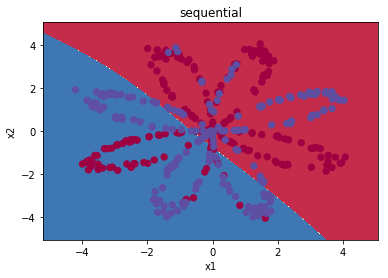

In [61]:
def plot_seq(x):
    out = F.sigmoid(seq_net(Variable(torch.from_numpy(x).float()))).data.numpy()
    out = (out > 0.5) * 1
    return out

plot_decision_boundary(lambda x: plot_seq(x), x.numpy(), y.numpy())
plt.title('sequential')

In [58]:
# Save Model ==============================

AttributeError: 'generator' object has no attribute 'info'

In [62]:
# save model and parameters
torch.save(seq_net, 'save_seq_net.pth')

# read model
seq_net1 = torch.load('save_seq_net.pth')
seq_net1 

In [63]:
seq_net1 

Sequential(
  (0): Linear(in_features=2, out_features=4, bias=True)
  (1): Tanh()
  (2): Linear(in_features=4, out_features=1, bias=True)
)

In [64]:
print(seq_net1[0].weight)

Parameter containing:
tensor([[-0.2896, -0.4587],
        [ 0.6389,  0.4151],
        [-0.0693,  0.4228],
        [-0.3061, -0.4545]], requires_grad=True)
